In [21]:
suppressPackageStartupMessages(suppressWarnings(library(lintr))) # linting
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes

In [22]:
# get path for confusion matrix
confusion_matrix_path <- file.path("../../../results/2.modeling/confusion_matrix.csv.gz")
cm_df <- read.csv(confusion_matrix_path, sep = ",")

# Display
head(cm_df)

,dataset_type,shuffled_model,predicted_labels,true_label,count,recall
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,train,False,Control,Control,4749,0.706066012
2,train,False,Cytoskeletal,Control,37,0.000000000
3,train,False,Hsp90,Control,10,0.012042819
4,train,False,Kinase,Control,47,0.037317871
5,train,False,Genotoxin,Control,123,0.002527505
6,train,False,Miscellaneous,Control,131,0.010853405


In [23]:
# update one of the shuffled_model columns to Shuffled and Not Shuffled
cm_df$shuffled_model <- ifelse(cm_df$shuffled_model == "False", "Not Shuffled",
                            ifelse(cm_df$shuffled_model == "True", "Shuffled", cm_df$shuffled_model))

# Display the updated DataFrame
head(cm_df)

,dataset_type,shuffled_model,predicted_labels,true_label,count,recall
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,train,Not Shuffled,Control,Control,4749,0.706066012
2,train,Not Shuffled,Cytoskeletal,Control,37,0.000000000
3,train,Not Shuffled,Hsp90,Control,10,0.012042819
4,train,Not Shuffled,Kinase,Control,47,0.037317871
5,train,Not Shuffled,Genotoxin,Control,123,0.002527505
6,train,Not Shuffled,Miscellaneous,Control,131,0.010853405


Saving 6.67 x 6.67 in image


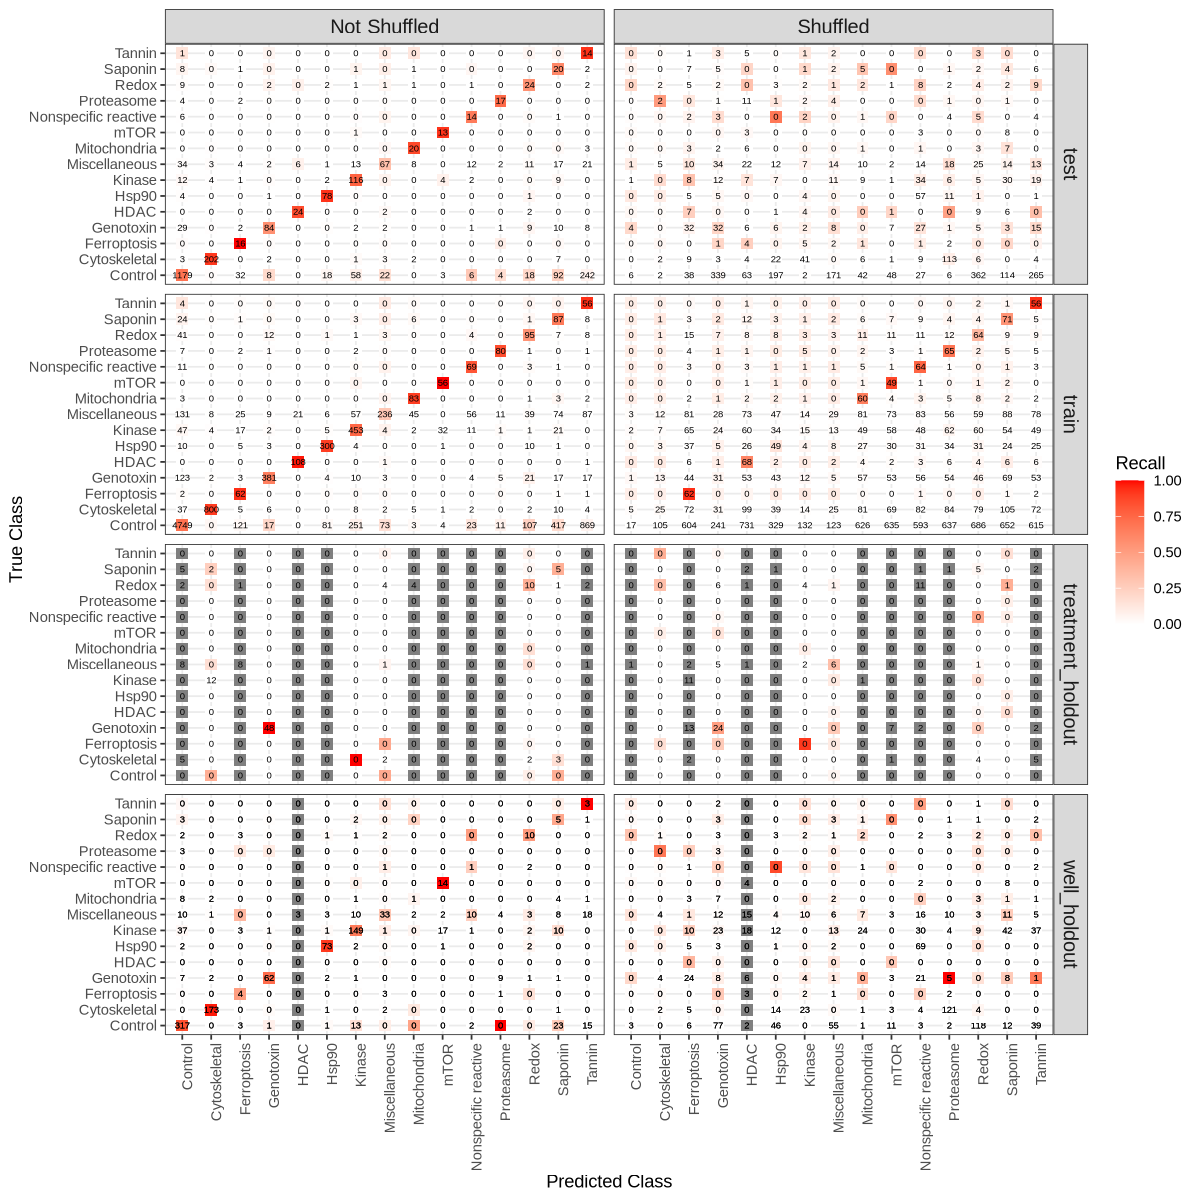

In [24]:
# set image dim
width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

# create a confusion matrix plot
confusion_matrix_plot <- (
    ggplot(cm_df, aes(x = true_label, y = predicted_labels))
    + facet_grid(dataset_type~shuffled_model)
    + geom_point(aes(color = recall), size = 3, shape = 15)
    + geom_text(aes(label = count), size = 2)
    + scale_color_gradient("Recall", low = "white", high = "red",limits = c(0, 1))
    + theme_bw()
    + ylab("True Class")
    + xlab("Predicted Class")
    + theme(strip.text = element_text(size = 12))
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
)

# saving file
ggsave(filename = "confusion_matrix.png")

confusion_matrix_plot